# Dating App Data Analysis

In today's world, people have more opportunities to meet new friends through online apps, allowing them to connect with individuals from different countries and cultures. This can be more interesting than meeting people in person. Online interactions are not only beneficial for shy or introverted individuals but also for those who are outgoing. Texting or calling without sharing private information can be more comfortable and relaxing, allowing people to be themselves more authentically.

As a result, more and more people are using dating apps. Although I have never used a dating app before, most of my friends do, and I’m curious about the traits and introductions that lead to more matches.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Dating App Data')

import pandas as pd

path= './Online_Dating_Behavior_Dataset.csv'

data1 = pd.read_csv(path)

path2 = './Online_Dating_Behavior_Dataset 2.csv'

data2 = pd.read_csv(path2)

Make two data frames into one table

In [ ]:
frames = [data1, data2]
data = pd.concat(frames)
data.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          2000 non-null   int64
 1   PurchasedVIP    2000 non-null   int64
 2   Income          2000 non-null   int64
 3   Children        2000 non-null   int64
 4   Age             2000 non-null   int64
 5   Attractiveness  2000 non-null   int64
 6   Matches         2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


We can found out that there's no data missing

From the dataset, we identified the presence of 'ghost users.' Therefore, for data cleaning purposes, we must exclude these users first. However, we can also glean some valuable insights from these ghost users.

In [ ]:
no_matches = data[data['Matches'] == 0]
no_matches.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,518.0,518.0,518.000000,518.000000,518.000000,518.000000,518.0
mean,0.0,0.0,51170.903475,0.961390,34.930502,5.397683,0.0
std,0.0,0.0,10415.908435,0.966787,8.964307,2.822977,0.0
min,0.0,0.0,20786.000000,0.000000,18.000000,1.000000,0.0
25%,0.0,0.0,44025.000000,0.000000,27.000000,3.000000,0.0
50%,0.0,0.0,51417.000000,1.000000,36.000000,6.000000,0.0
75%,0.0,0.0,58519.000000,2.000000,42.000000,8.000000,0.0
max,0.0,0.0,75269.000000,3.000000,49.000000,10.000000,0.0


After analyzing the data, we found that all ghost users are male. Therefore, let's delve deeper into the male user data to uncover any interesting insights.

In [ ]:
m_no_matches = data.query('Matches == 0 and Gender == 0 ')
m_h_matches = data.query('Matches > 0 and Gender == 0')

In [ ]:
m_no_matches.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,518.0,518.0,518.000000,518.000000,518.000000,518.000000,518.0
mean,0.0,0.0,51170.903475,0.961390,34.930502,5.397683,0.0
std,0.0,0.0,10415.908435,0.966787,8.964307,2.822977,0.0
min,0.0,0.0,20786.000000,0.000000,18.000000,1.000000,0.0
25%,0.0,0.0,44025.000000,0.000000,27.000000,3.000000,0.0
50%,0.0,0.0,51417.000000,1.000000,36.000000,6.000000,0.0
75%,0.0,0.0,58519.000000,2.000000,42.000000,8.000000,0.0
max,0.0,0.0,75269.000000,3.000000,49.000000,10.000000,0.0


In [ ]:
m_h_matches.describe()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
count,462.0,462.0,462.000000,462.000000,462.000000,462.000000,462.0
mean,0.0,1.0,50030.043290,0.969697,34.419913,5.619048,70.0
std,0.0,0.0,8451.386411,1.038913,9.300542,2.884980,0.0
min,0.0,1.0,28011.000000,0.000000,18.000000,1.000000,70.0
25%,0.0,1.0,44315.750000,0.000000,26.250000,3.000000,70.0
50%,0.0,1.0,50155.000000,1.000000,35.000000,6.000000,70.0
75%,0.0,1.0,55992.750000,2.000000,42.750000,8.000000,70.0
max,0.0,1.0,73193.000000,3.000000,49.000000,10.000000,70.0


From the data in the two tables, we can conclude that ghost users are predominantly males who did not purchase VIP memberships. It is possible that they stopped using the app after finding a partner or did not consider the VIP membership worthwhile. On the other hand, all males who have matches did purchase VIP memberships, with the maximum number of matches being 70. This result appears unusual and confusing.

## Then let's do some data visualization to see the result more clearly

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
male = data.query('Gender == 0')
male.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0
6,0,1,58339,0,33,9,70


In [ ]:
male['Match Status'] = np.where(male['Matches']>0, 'with Matches', 'no Matches')
male.head()

<ipython-input-11-f85cf090345f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Match Status'] = np.where(male['Matches']>0, 'with Matches', 'no Matches')


,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches,Match Status
0,0,1,51777,3,47,5,70,with Matches
2,0,0,53801,1,25,5,0,no Matches
3,0,0,56105,0,35,8,0,no Matches
4,0,0,55597,1,36,6,0,no Matches
6,0,1,58339,0,33,9,70,with Matches


In [ ]:
male['Matches'].value_counts()

Matches
0     518
70    462
Name: count, dtype: int64

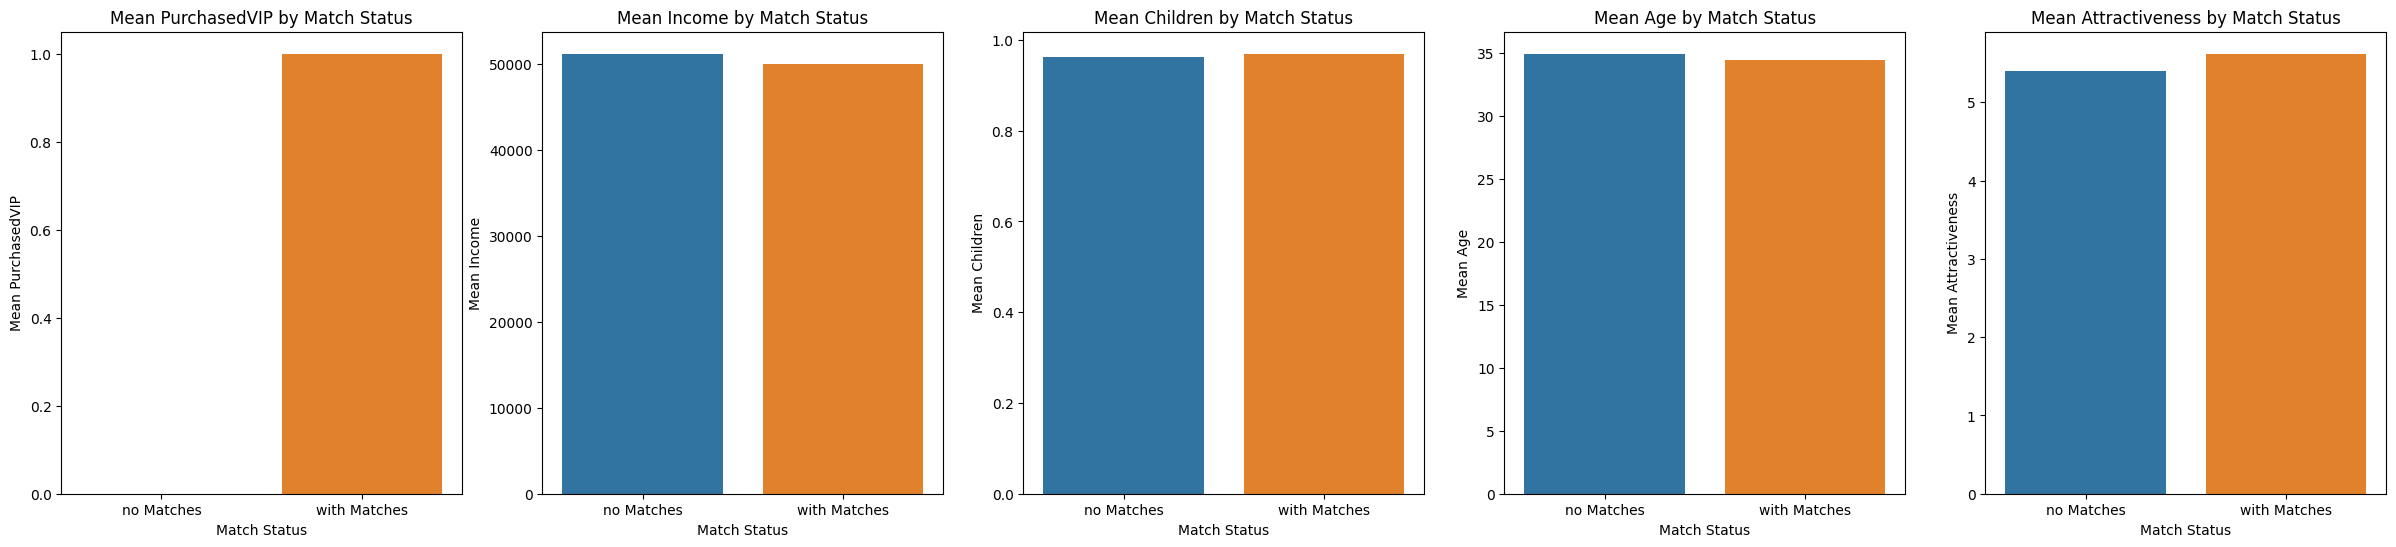

In [ ]:
cols = ['PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness']

fig, axs = plt.subplots(1, 5, figsize=(30, 6))

for ax, col in zip(axs, cols):
    mean_values = male.groupby('Match Status')[col].mean().reset_index()
    sns.barplot(x='Match Status', y=col, data=mean_values, ax=ax, hue='Match Status')
    ax.set_title(f'Mean {col} by Match Status')
    ax.set_xlabel('Match Status')
    ax.set_ylabel(f'Mean {col}')

There is no significant difference between males with no matches and those with matches, except that males need to purchase VIP memberships to get matches. However, the number of matches is always 70, which is very strange. Therefore, the male data isn't very helpful or accurate.

Before examining the data for female users, I can make some assumptions about factors that might lead to higher match rates:

1. Purchasing VIP can end up with more matches.
2. Higher income may result in more matches.
3. Fewer children could lead to more matches.
4. Younger individuals might have more matches.
5. Attractiveness is likely to reflect market trends accurately.


## Now let's take a look at female's data

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
female = data.query('Gender == 1')
female.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
1,1,0,36646,0,42,7,130
5,1,0,60807,0,49,5,110
9,1,1,33390,0,25,8,140
14,1,0,39189,2,42,6,120
16,1,1,49604,1,21,9,150


In [ ]:
female.corr()['Matches']

Gender                 NaN
PurchasedVIP      0.033623
Income           -0.008486
Children          0.018900
Age              -0.103664
Attractiveness    1.000000
Matches           1.000000
Name: Matches, dtype: float64

The correlation coefficients reveal that most of my assumptions were incorrect. Factors that significantly impact the real world seem to have no influence on getting more matches, which doesn't make sense.

Drawing conclusions solely from correlation coefficients isn't sufficient. Therefore, let's also examine some plot graphs and the results of linear regression.

## Factor 1: PurchasedVIP

<Axes: xlabel='PurchasedVIP', ylabel='Matches'>

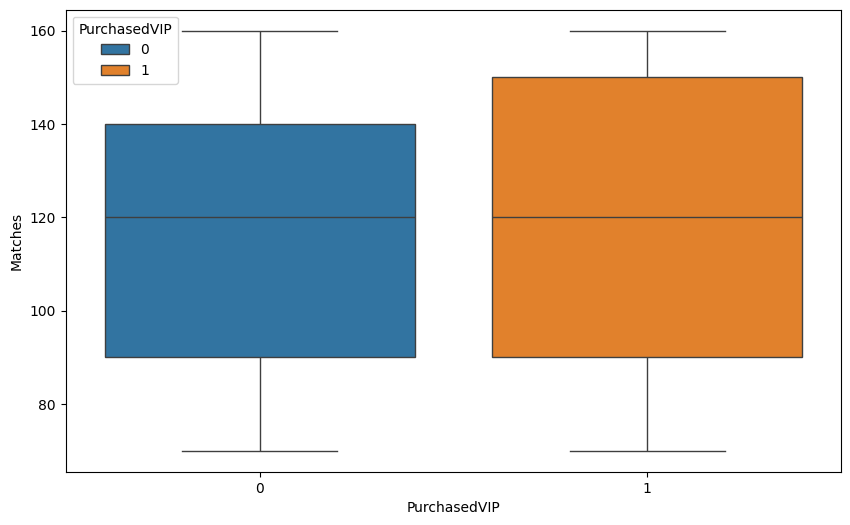

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchasedVIP', y='Matches', data=female, hue='PurchasedVIP')

In [ ]:
model = ols('Matches ~ C(PurchasedVIP)', data=female).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.152
Date:                Wed, 17 Jul 2024   Prob (F-statistic):              0.283
Time:                        16:03:14   Log-Likelihood:                -4841.9
No. Observations:                1020   AIC:                             9688.
Df Residuals:                    1018   BIC:                             9698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              116.5169      1.208     96.467      0.000     114.147     118.887
C(PurchasedVIP)[T.1]     1.8782      1.750      1.073      0.283      -1.555       5.312
==============================================================================
Omnibus:                      633.790   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.996
Skew:                          -0.079   Prob(JB):                     9.38e-14
Kurtosis:                       1.823   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the box plot, we can see that VIPs have slightly higher matches than non-VIPs. However, there is no significant difference between females who purchased VIP and those who didn't. The average number of matches is the same, indicating that VIPs do not have the expected advantage. Additionally, after running a linear regression, we observe that the p-value for this factor is not significant, indicating that VIP status is not a helpful variable for getting more matches.

## Factor 2: Income

<ipython-input-17-259ea6d07ad3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Income', y='Matches', data=female, palette=gradient_palette)


<Axes: xlabel='Income', ylabel='Matches'>

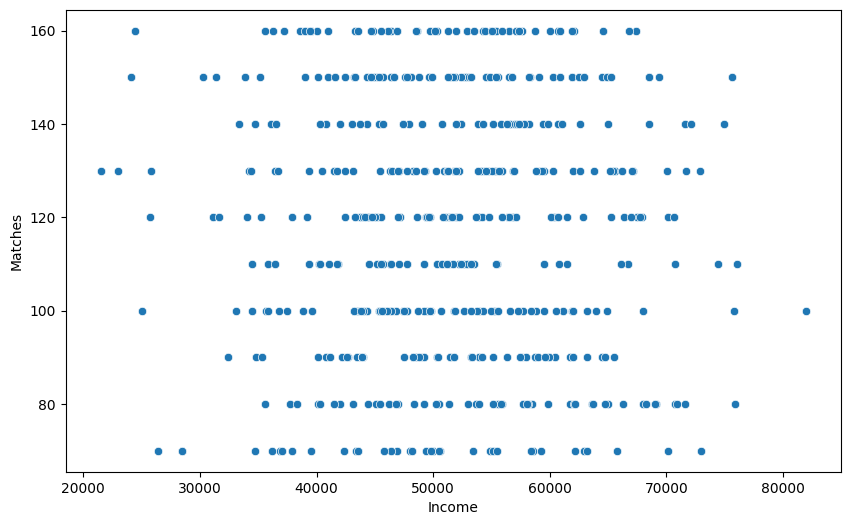

In [ ]:
plt.figure(figsize=(10, 6))
gradient_palette = sns.color_palette("coolwarm", as_cmap=False, n_colors=female['Income'].nunique())
sns.scatterplot(x='Income', y='Matches', data=female, palette=gradient_palette)


In [ ]:
model1 = ols('Matches ~ Income', data=female).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07332
Date:                Wed, 17 Jul 2024   Prob (F-statistic):              0.787
Time:                        16:06:52   Log-Likelihood:                -4842.5
No. Observations:                1020   AIC:                             9689.
Df Residuals:                    1018   BIC:                             9699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.6049      4.492     26.401      0.000     109.790     127.420
Income     -2.325e-05   8.58e-05     -0.271      0.787      -0.000       0.000
==============================================================================
Omnibus:                      621.861   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.649
Skew:                          -0.076   Prob(JB):                     1.12e-13
Kurtosis:                       1.825   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Based on the scatterplot above, we can see that females with lower income can still have higher matches, which is not too surprising as other factors might contribute to their attractiveness. However, there is no obvious trend indicating that higher income leads to more matches, which is unexpected. Additionally, from the p-value score, we can conclude that income is not a useful variable for predicting matches.

## Factor 3: Children

<ipython-input-18-87de9f8d5c81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Children', y='Matches', data=female, ax=axes[0], palette=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
<ipython-input-18-87de9f8d5c81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Children', data=female, ax=axes[1], palette=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])


<Axes: xlabel='Children', ylabel='count'>

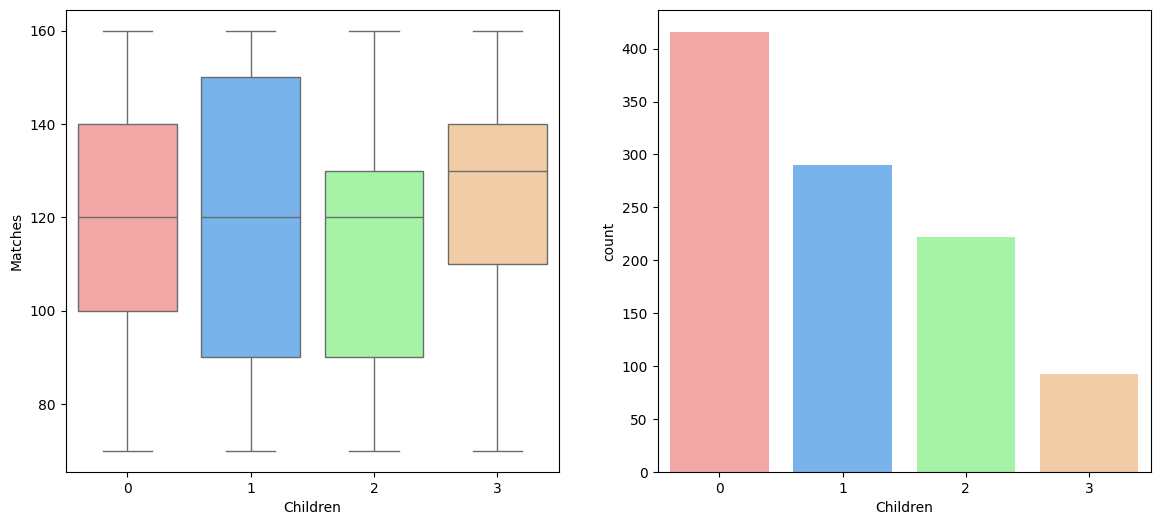

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Children', y='Matches', data=female, ax=axes[0], palette=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
sns.countplot(x='Children', data=female, ax=axes[1], palette=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

In [ ]:
model2 = ols('Matches ~ Children', data=female).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3638
Date:                Wed, 17 Jul 2024   Prob (F-statistic):              0.547
Time:                        16:06:43   Log-Likelihood:                -4842.3
No. Observations:                1020   AIC:                             9689.
Df Residuals:                    1018   BIC:                             9699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.8860      1.235     94.673      0.000     114.463     119.309
Children       0.5310      0.880      0.603      0.547      -1.197       2.259
==============================================================================
Omnibus:                      592.327   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.890
Skew:                          -0.072   Prob(JB):                     1.63e-13
Kurtosis:                       1.832   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After analyzing the data, we see that females with more children even have more matches than those without children. Although the number of such females is small and the result might not be entirely reliable, there is still no indication that fewer children lead to more matches. The results of the linear regression also confirm that this variable is not helpful.

## Factor 4: Age

<ipython-input-19-17f9c7581304>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Matches', data=female, ax=axes[0], palette= gradient_palette_1)
<ipython-input-19-17f9c7581304>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=female, ax=axes[1], palette= gradient_palette_1)


<Axes: xlabel='Age', ylabel='count'>

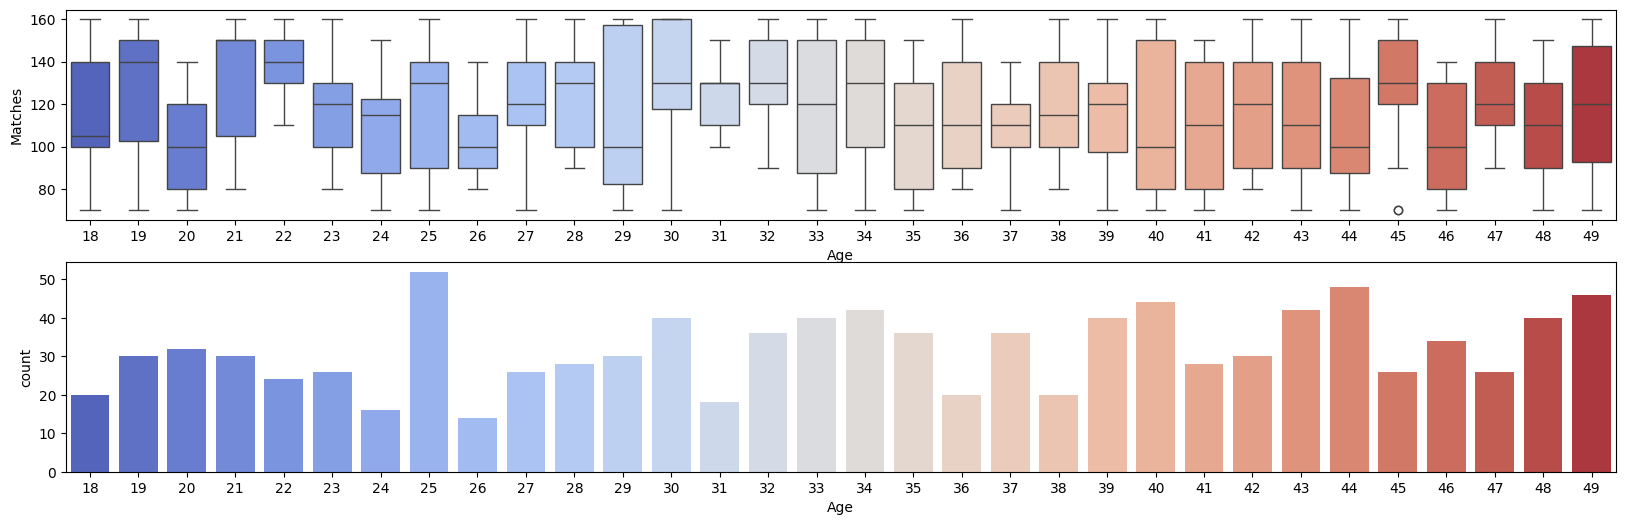

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20, 6))
gradient_palette_1 = sns.color_palette("coolwarm", as_cmap=False, n_colors=female['Age'].nunique())
sns.boxplot(x='Age', y='Matches', data=female, ax=axes[0], palette= gradient_palette_1)
sns.countplot(x='Age', data=female, ax=axes[1], palette= gradient_palette_1)

In [ ]:
model3 = ols('Matches ~ Age', data=female).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.06
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           0.000914
Time:                        16:07:22   Log-Likelihood:                -4837.0
No. Observations:                1020   AIC:                             9678.
Df Residuals:                    1018   BIC:                             9688.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3117      3.391     37.837      0.000     121.657     134.966
Age           -0.3155      0.095     -3.325      0.001      -0.502      -0.129
==============================================================================
Omnibus:                      567.969   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.435
Skew:                          -0.078   Prob(JB):                     2.05e-13
Kurtosis:                       1.838   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fact that younger females tend to have more matches is somewhat evident from the graphs, although there is no very clear evidence showing that older females have fewer matches. In order to know more and deeper, we run a linear regression and find that age does have a significant influence on the number of matches.



## Factor 5: Attractiveness

<Axes: xlabel='Attractiveness', ylabel='count'>

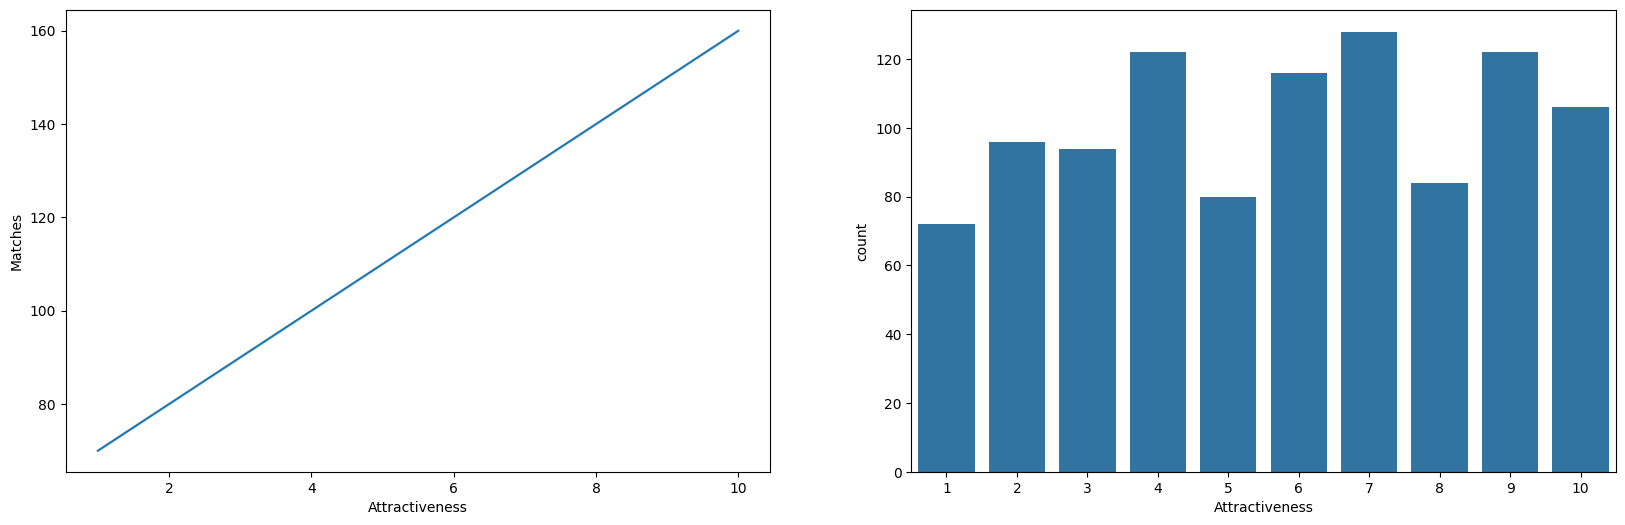

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x='Attractiveness', y='Matches', ax=axes[0], data=female)
sns.countplot(x='Attractiveness', data=female, ax=axes[1])

In [ ]:
model4 = ols('Matches ~ Attractiveness', data=female).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Matches   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.792e+31
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:09:11   Log-Likelihood:                 28327.
No. Observations:                1020   AIC:                        -5.665e+04
Df Residuals:                    1018   BIC:                        -5.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         60.0000   1.51e-14   3.98e+15      0.000      60.000      60.000
Attractiveness    10.0000   2.36e-15   4.23e+15      0.000      10.000      10.000
==============================================================================
Omnibus:                      143.425   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.847
Skew:                           0.561   Prob(JB):                     1.02e-18
Kurtosis:                       2.169   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results of the graphs and linear regression, we can conclude that attractiveness is a significant factor in predicting matches. If you consider yourself attractive, you are likely to receive more matches. It appears that females have a good understanding of their own attractiveness and how they will perform in the dating market.

## In conclusion, after extensive analysis of this dataset, I can confidently say that it is neither reliable nor useful, as many of the results contradict established facts. Despite this, the project was still fun and interesting to work on.